# Data analysis for our study on the transparency and open science standards in the policies of medical and health science journals

The protocol and details of our study is openly availble via the OSF [here](https://osf.io/h2xud/).

In [1]:
# import libraries required for analysis 
import numpy as np 
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data 
df=pd.read_csv("TOP_medj_totals.csv",thousands=',')
df.head()

,Journal,Citation,Data transparency,Analytic methods (Code),Materials,Design & analysis,Study prereg,Analysis prereg,Replication,TOP_8,TOP signatory,Reg reports,Open sci badges,extra_total,grand_total,COI1,COI2,COI3,COI4,COI_total
0,Cell,2,2,3,2,2,1,1,0,13,1,0,0,1,14,1,1,1,0,3
1,Nat.Med.,1,2,3,2,2,1,1,1,13,1,0,0,1,14,1,1,1,1,4
2,Neuron,2,2,3,2,2,1,1,0,13,1,0,0,1,14,1,1,1,0,3
3,Nat.Neurosci.,1,2,3,2,2,1,1,1,13,1,0,0,1,14,1,1,1,1,4
4,Nat.Genet.,1,2,2,2,2,1,1,1,12,1,0,0,1,13,1,1,1,1,4


In [3]:
df.describe()

,Citation,Data transparency,Analytic methods (Code),Materials,Design & analysis,Study prereg,Analysis prereg,Replication,TOP_8,TOP signatory,Reg reports,Open sci badges,extra_total,grand_total,COI1,COI2,COI3,COI4,COI_total
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.00000,20.000000,20.0,20.0,20.000000,20.000000
mean,0.800000,1.200000,1.150000,1.050000,1.200000,0.500000,0.400000,0.300000,6.600000,0.450000,0.100000,0.0,0.550000,7.15000,0.950000,1.0,1.0,0.900000,3.850000
std,0.833509,0.894427,1.225819,0.944513,0.615587,0.512989,0.502625,0.470162,4.913997,0.510418,0.307794,0.0,0.604805,5.23425,0.223607,0.0,0.0,0.307794,0.366348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,1.0,1.0,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,2.00000,1.000000,1.0,1.0,1.000000,4.000000
50%,1.000000,1.500000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,0.500000,6.50000,1.000000,1.0,1.0,1.000000,4.000000
75%,1.250000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,12.000000,1.000000,0.000000,0.0,1.000000,13.00000,1.000000,1.0,1.0,1.000000,4.000000
max,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,0.0,2.000000,14.00000,1.000000,1.0,1.0,1.000000,4.000000


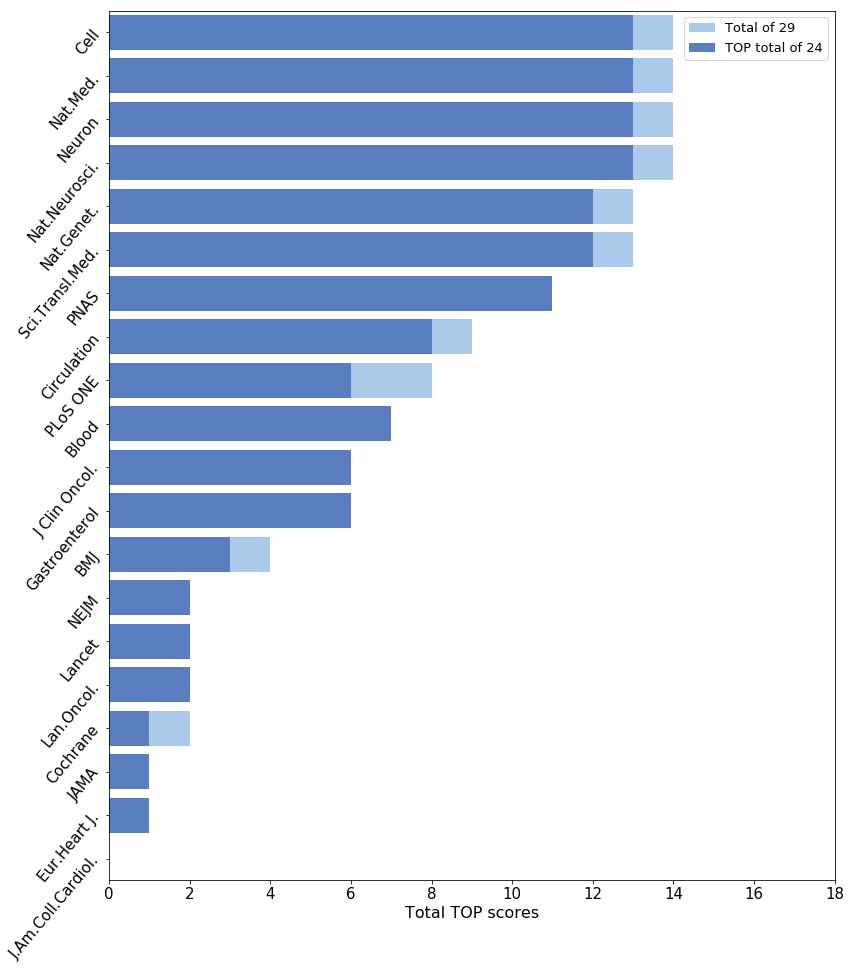

In [8]:
# plotting the grand total score (TOP 8 + 3 extras) of cases overtime using seaborn with different colours

f, ax = plt.subplots(figsize=(13, 16))

# Plot grand total
sns.set_color_codes("pastel")
sns.barplot(x="grand_total", y="Journal", data=df,
            label="Total of 29", color="b")

# Plot TOP 8 standards
sns.set_color_codes("muted")
sns.barplot(x="TOP_8", y="Journal", data=df,
            label="TOP total of 24", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True, fontsize=13)
ax.set(xlim=(0, 18), 
       ylabel="")

degrees=50
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=degrees)
plt.xlabel("Total TOP scores", fontsize=16)

plt.savefig("fig1_totalTOPcombined.png", dpi=600)

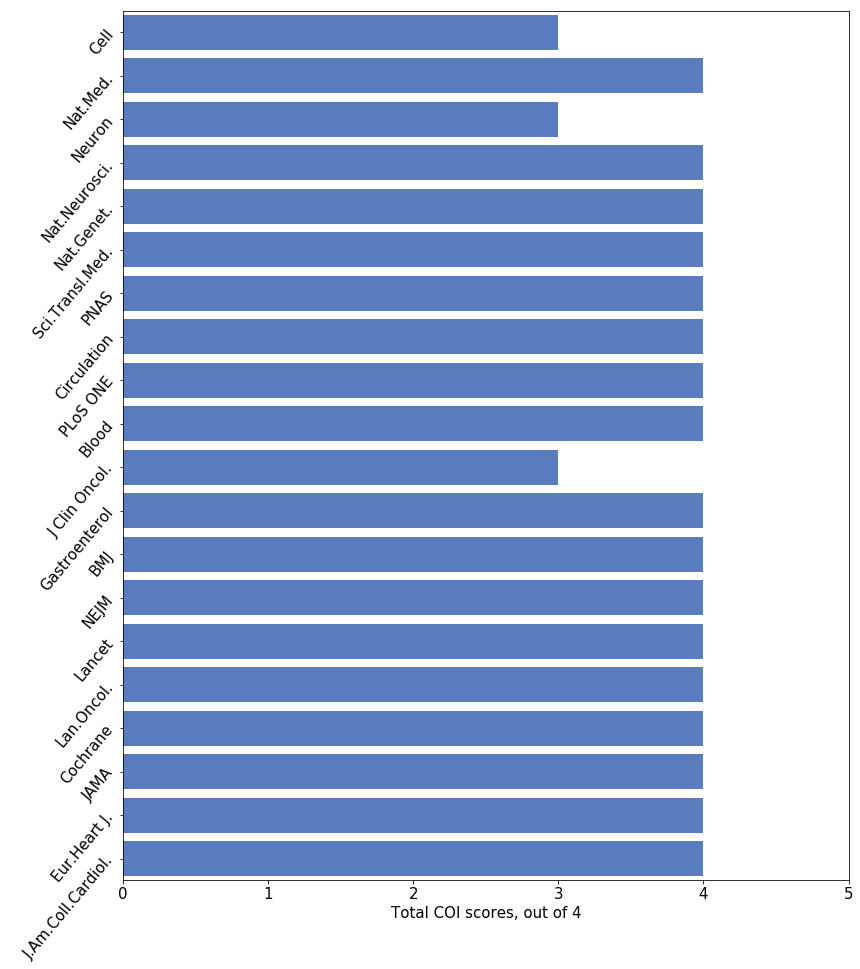

In [9]:
# plotting the total COI scores

plt.figure(figsize=(13,16))
sns.set_color_codes("muted")
ax = sns.barplot(data=df, x="COI_total", y="Journal", color="b")
plt.xlabel('Total COI scores, out of 4', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 5))

plt.savefig("fig2_COI.png", dpi=600)

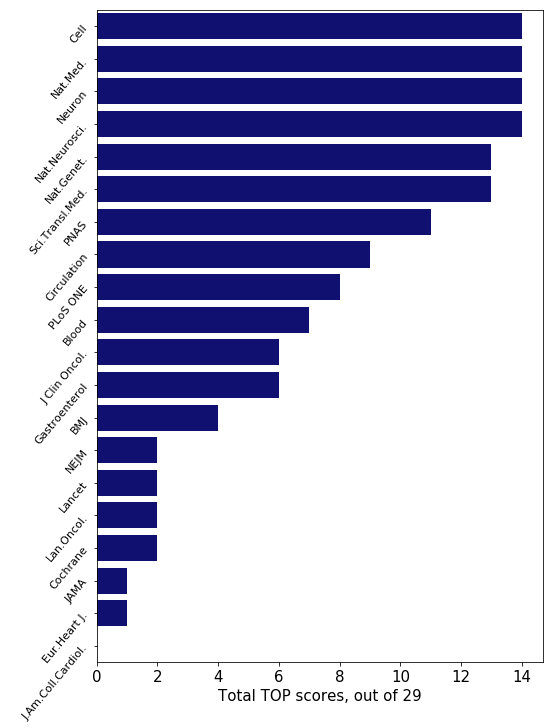

In [13]:
# plotting the grand total score (TOP 8 + 3 extras) of cases overtime using seaborn

plt.figure(figsize=(8,12))
ax = sns.barplot(data=df, x="grand_total", y="Journal", color="navy")
plt.xlabel('Total TOP scores, out of 29', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=11, rotation=degrees)

plt.savefig("fig1_totalTOP.png", dpi=600)